# Explore Telecom Customer dataset and build predictive models for churn



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns  
import scipy.stats as sta
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
sns.set_palette("viridis", 3)

In [3]:

np.random.rand(10, 2)

array([[0.45462131, 0.2650782 ],
       [0.78506405, 0.61579514],
       [0.70024953, 0.24052135],
       [0.07513471, 0.85633886],
       [0.21278458, 0.80908649],
       [0.36355655, 0.47071885],
       [0.8592578 , 0.28244306],
       [0.52823407, 0.82366419],
       [0.43089854, 0.28906863],
       [0.68791284, 0.74310927]])

### Load and Clean data

In [192]:
path = r'E:\DATA\tele_cus\telecom_customers.csv'
df = pd.read_csv(path)
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [194]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

####  Convert TotalCharges column to numeric

In [195]:
def convert_to_numeric (feature) :
    df[feature] =pd.to_numeric(df[feature], errors = 'coerce')
    
convert_to_numeric('TotalCharges')

In [196]:
df.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [197]:
df.drop(['Unnamed: 0','customerID'], axis =1, inplace=True)

In [198]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing value treatment 

In [199]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df.loc[:, 'TotalCharges'] = imputer.fit_transform(df.loc[:, 'TotalCharges'].values.reshape(-1,1))

In [200]:
print(df.isnull().values.any())
df.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Categorize Features to categorical values and continuous values

In [201]:
df.SeniorCitizen = df.SeniorCitizen.astype('str')
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Churn']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]

## Exploratory Data Analysis

Churn
No     5174
Yes    1869
dtype: int64


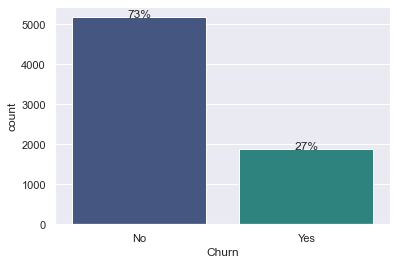

In [202]:
print(df.groupby(['Churn']).size())
churn_plot = sns.countplot(data=df, x='Churn',)#, order=df.Churn.value_counts().index)
for p in churn_plot.patches :
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2, height, '{0:.0%}'.format(height/len(df)), ha='center')
plt.show()

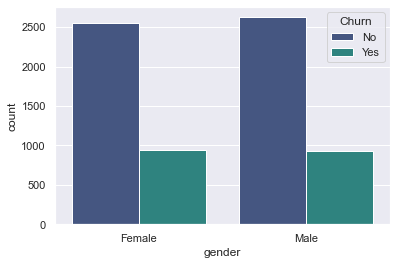

In [203]:
gender_churn_plot = sns.countplot(data=df, x='gender', hue='Churn')

There is no much difference in Genere base customer

### Count plots for  all categorical features 

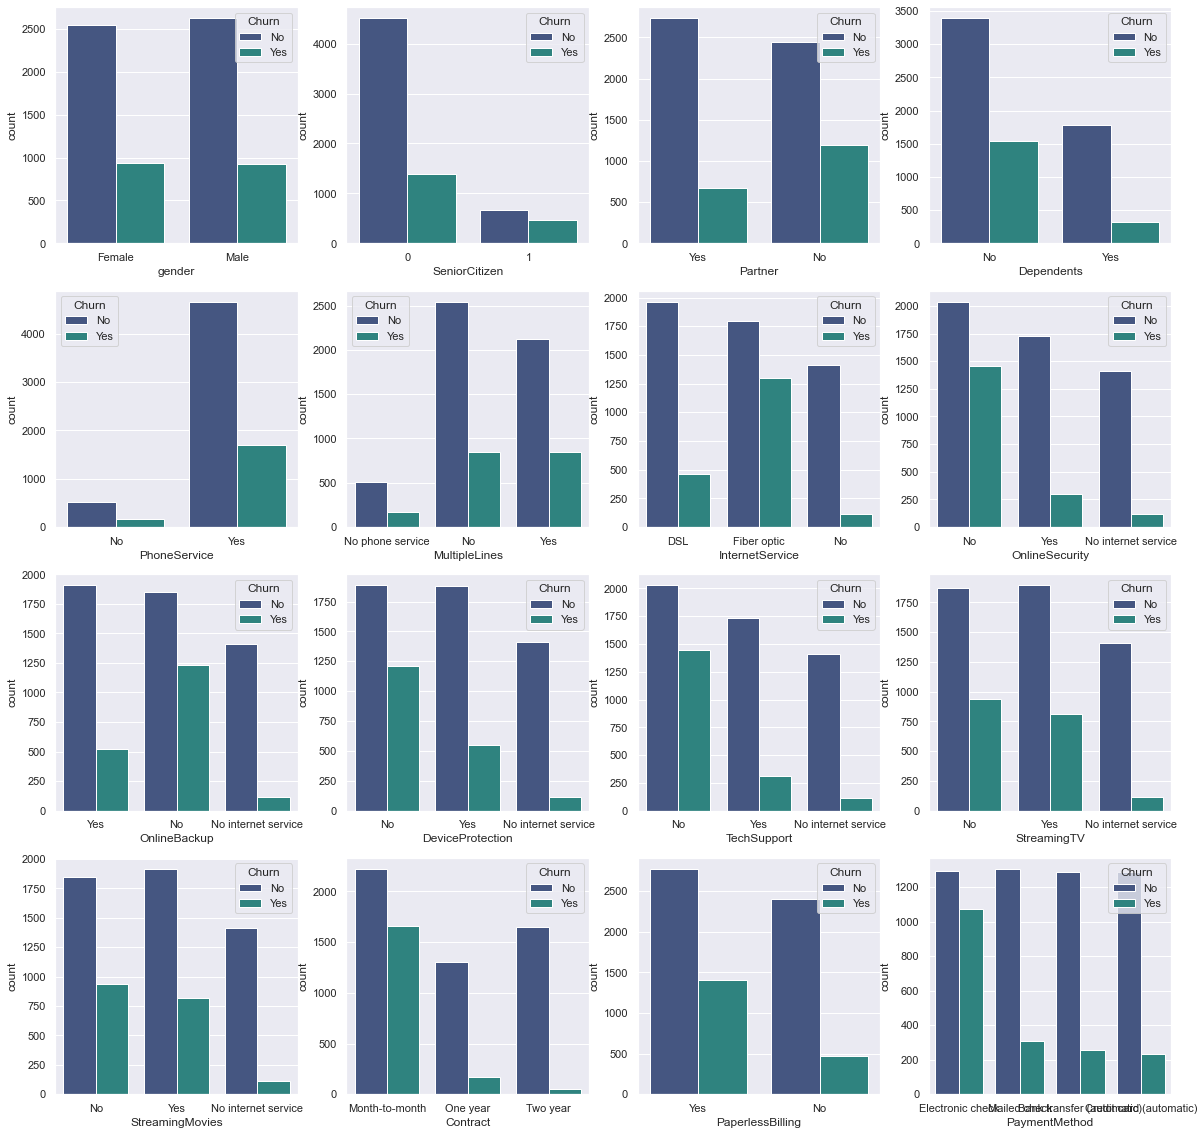

In [204]:
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
 
for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i])

### Continuous feature histograms

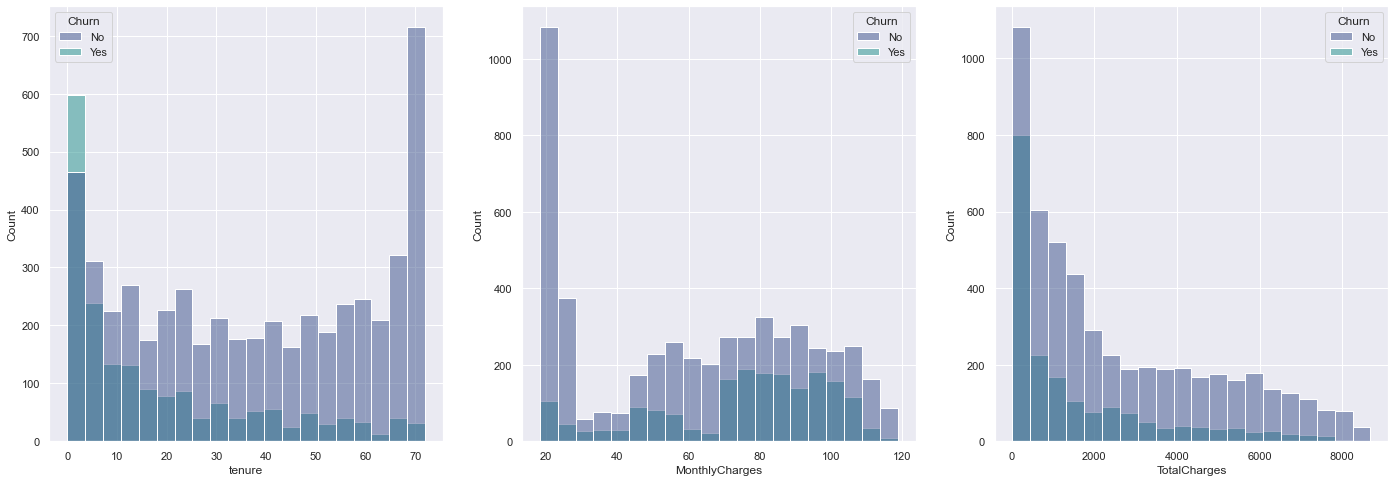

In [205]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
for i, p in enumerate(continues_features) :
        sns.histplot(data=df, x=p, ax=ax[i], hue='Churn', bins=20)
          

### Pairwise relationships

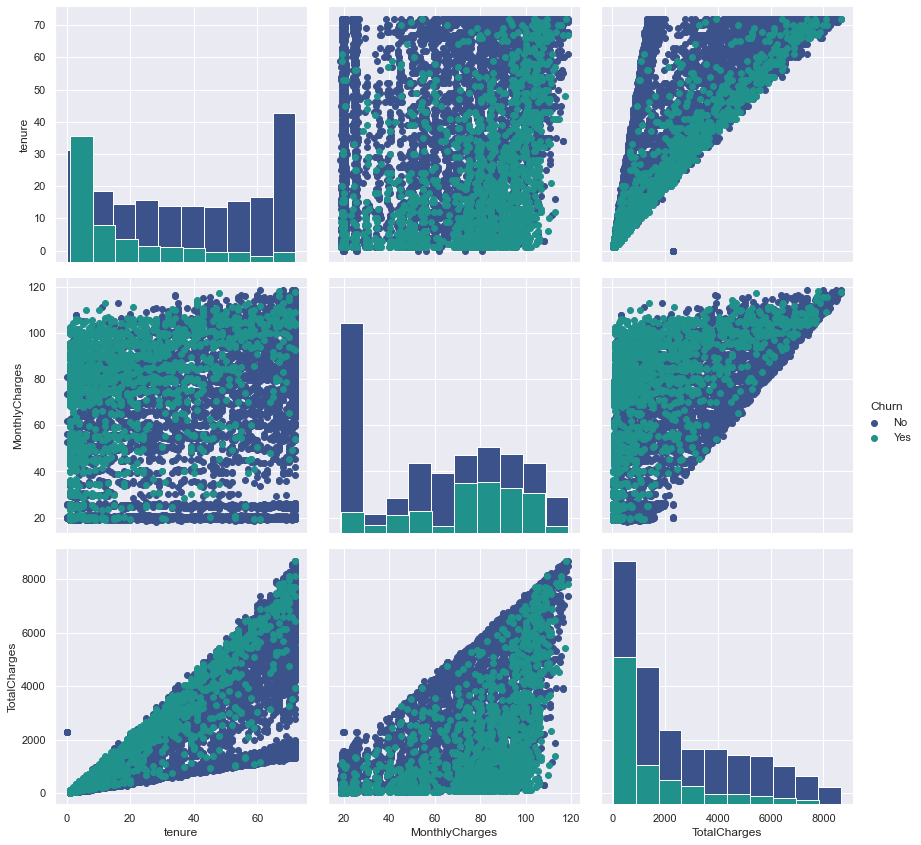

In [206]:
grid = sns.PairGrid(df, hue='Churn', height=4)
grid = grid.map_diag(plt.hist)
grid = grid.map_offdiag(plt.scatter)
grid = grid.add_legend()

Tenure has opposite effect on Churn "Yes" or "No". Churn customers have minimum tenure, where in no churn customers prefer longer tenure

### Box plots for numerical columns

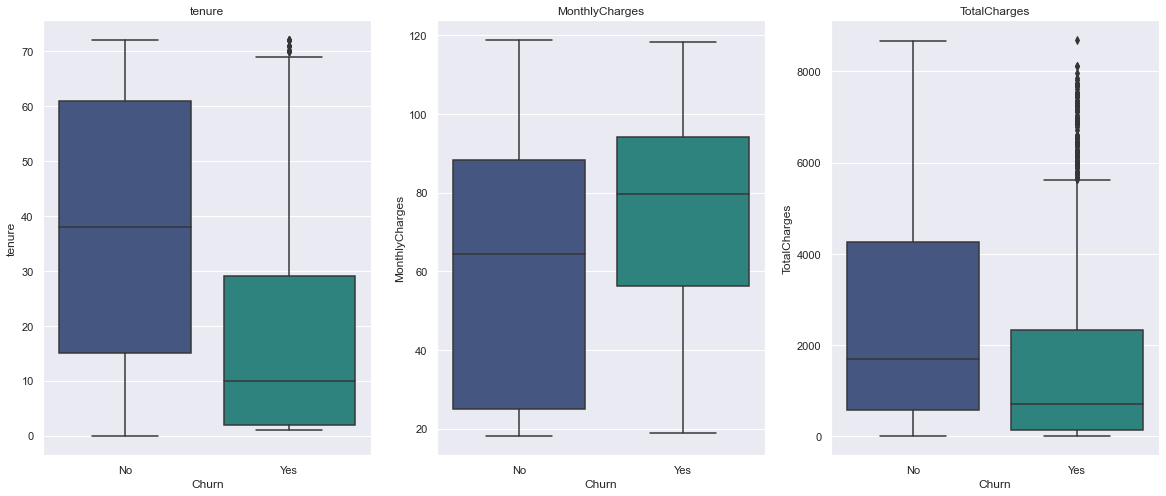

In [207]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=df, x='Churn', y=p, ax=ax[i])
        ax[i].set_title(p)

### Pearson (linear) correlation

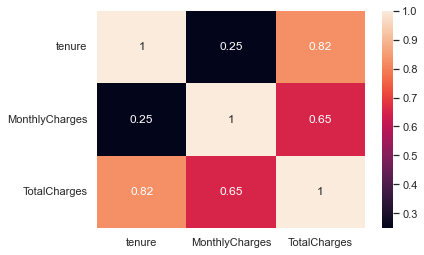

In [208]:
sns.heatmap(data= df.corr(method='pearson'), annot=True)
plt.show()

## Data pre-processing:

Encode a string column of labels to a column of label indices

In [209]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)
df.replace('No internet service', 0, inplace=True)
df.replace('No phone service', 0, inplace=True)
df.replace('Fiber optic', 2, inplace=True)
df.replace('DSL',1, inplace=True)
df.replace('Male',1, inplace=True)
df.replace('Female',0, inplace=True)
df = pd.get_dummies(data=df, columns=['Contract', 'PaymentMethod'])

In [210]:
df.head().T

,0,1,2,3,4
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,0,0,0,0,0
InternetService,1,1,1,1,2
OnlineSecurity,0,1,1,1,0
OnlineBackup,1,0,1,0,0


In [211]:
X = df.drop('Churn', axis=1)
X.sort_index(axis=1, inplace=True)
y = df['Churn']
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [212]:
p_columns = X.columns.to_list()


In [213]:
sample_df = pd.concat([df[df['Churn']==0].sample(1869), df[df['Churn']==1]])
X = sample_df.drop('Churn', axis=1)
X.sort_index(axis=1, inplace=True)
y = sample_df['Churn']
y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
print(f'x_train Length : {len(x_train)}')
print(f'x_test Length : {len(x_test)}')
print(f'y_train value counts : {y_train.value_counts()}')
print(f'y_test value counts : {y_test.value_counts()}')

x_train Length : 2616
x_test Length : 1122
y_train value counts : 1    1325
0    1291
Name: Churn, dtype: int64
y_test value counts : 0    578
1    544
Name: Churn, dtype: int64


In [217]:
Scl = StandardScaler()
x_train[continues_features] = Scl.fit_transform(x_train[continues_features])
x_test[continues_features] = Scl.transform(x_test[continues_features])

# Create a model

In [218]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier as tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

### Decision Tree Model

In [219]:
dtree_model = tree(criterion = 'entropy')
dtree_model.fit(x_train, y_train)
print(f'Accuracy for train model : {dtree_model.score(x_train, y_train)}')
y_pred = dtree_model.predict(x_test)
print(f'Accuracy for test model : {accuracy_score(y_test, y_pred)}')

Accuracy for train model : 0.9988532110091743
Accuracy for test model : 0.7058823529411765


Accuracy score for the Train data is very high but in Test data is low. which means the model is **overfitted** on Training data.  

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       578
           1       0.69      0.72      0.70       544

    accuracy                           0.71      1122
   macro avg       0.71      0.71      0.71      1122
weighted avg       0.71      0.71      0.71      1122



### Select Best Classifier

In [221]:
clf = [AdaBoostClassifier(), RandomForestClassifier(), 
       BaggingClassifier(), GradientBoostingClassifier()]
for model in clf :
    print('Results for : ', model)
    model.fit(x_train, y_train)
    print(f'Accuracy for train data : {model.score(x_train, y_train)}')
    y_pred = model.predict(x_test)
    print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Results for :  AdaBoostClassifier()
Accuracy for train data : 0.7744648318042814
Accuracy for test data : 0.7442067736185384
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       578
           1       0.72      0.77      0.75       544

    accuracy                           0.74      1122
   macro avg       0.75      0.75      0.74      1122
weighted avg       0.75      0.74      0.74      1122

Results for :  RandomForestClassifier()
Accuracy for train data : 0.9988532110091743
Accuracy for test data : 0.7379679144385026
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       578
           1       0.72      0.76      0.74       544

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122

Results for :  BaggingClassifier()
Accuracy for train data : 0.9835626911314985
Accuracy for

#### GradeientBoosting Classifier seems to work better compared to other models

### Hyperparameters tuning

[(50, 0.7954892966360856, 0.7557932263814616), (60, 0.8004587155963303, 0.7549019607843137), (70, 0.8061926605504587, 0.7557932263814616), (80, 0.8096330275229358, 0.7620320855614974), (90, 0.8126911314984709, 0.7611408199643493), (100, 0.8184250764525994, 0.7602495543672014), (110, 0.823394495412844, 0.7593582887700535), (120, 0.8222477064220184, 0.7575757575757576), (130, 0.8295107033639144, 0.7557932263814616), (140, 0.8329510703363915, 0.7540106951871658), (150, 0.8348623853211009, 0.7522281639928698), (160, 0.8375382262996942, 0.7513368983957219), (170, 0.8413608562691132, 0.7486631016042781), (180, 0.8436544342507645, 0.749554367201426), (190, 0.8478593272171254, 0.7468805704099821)]


<AxesSubplot:>

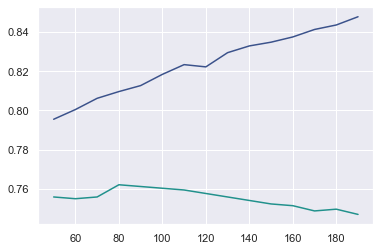

In [222]:
n = [i*10 for i in range(5,20)]
n_es = []
train_score = []
test_score = []
for i in n :
    Grboost_model = GradientBoostingClassifier(n_estimators=i, random_state=1)
    Grboost_model.fit(x_train, y_train)
    y_pred = Grboost_model.predict(x_test)
    n_es.append(i)
    train_score.append(Grboost_model.score(x_train, y_train))
    test_score.append(accuracy_score(y_test, y_pred))
print([(i,j,k) for i,j,k in zip(n_es, train_score, test_score)])    
sns.lineplot(n_es, train_score)
sns.lineplot(n_es, test_score)


Accuracy for train data : 0.8061926605504587
Accuracy for test data : 0.7557932263814616
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       578
           1       0.73      0.79      0.76       544

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122

Confusion matrix :


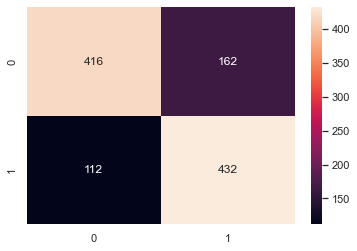

In [223]:
Grboost_model = GradientBoostingClassifier(n_estimators=70, random_state=1)
Grboost_model.fit(x_train, y_train)
y_hat = Grboost_model.predict(x_test)
print(f'Accuracy for train data : {Grboost_model.score(x_train, y_train)}')
y_pred = Grboost_model.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print('Confusion matrix :')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2d')
plt.show()


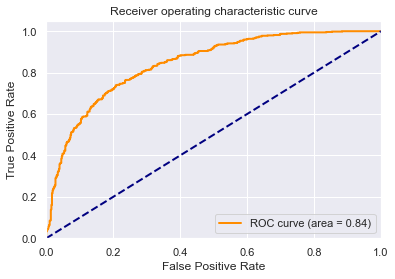

In [224]:
y_score = Grboost_model.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


In [225]:
y_prob = Grboost_model.predict_proba(x_test)

In [226]:
y_pred = pd.DataFrame(y_pred).rename(columns={0:'y_pred'})
y_prob = pd.DataFrame(y_prob).rename(columns={0:'No_prob', 1:'Yes_prob'})
y_prob.index = x_test.index
y_pred.index = x_test.index
test_data = pd.concat([x_test, y_test, y_pred, y_prob], axis=1)

In [227]:
test_data

,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,...,StreamingMovies,StreamingTV,TechSupport,TotalCharges,gender,tenure,Churn,y_pred,No_prob,Yes_prob
6747,0,1,0,0,1,1,-1.138326,0,0,1,...,0,0,0,-0.035551,0,0.999770,0,0,0.918214,0.081786
6974,0,1,0,0,1,2,1.085920,1,0,0,...,1,1,0,1.348582,0,0.958265,0,0,0.532289,0.467711
2541,0,0,1,1,1,1,-0.494557,0,0,1,...,1,1,0,0.887714,0,1.829871,0,0,0.952937,0.047063
6478,0,0,1,0,1,2,1.505159,1,1,0,...,1,1,1,2.132742,0,1.331811,0,0,0.714439,0.285561
1966,1,0,0,0,0,1,-0.459475,1,1,0,...,0,0,0,-0.344764,1,-0.162371,0,0,0.633387,0.366613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,1,0,0,0,0,2,0.059750,0,0,0,...,0,0,0,-0.910579,0,-1.116987,1,1,0.108629,0.891371
2937,0,1,0,1,1,2,0.875424,1,1,0,...,1,0,0,1.827095,0,1.497831,0,0,0.702266,0.297734
6518,1,0,0,0,0,1,-0.792761,0,0,0,...,0,0,0,-0.921833,1,-1.116987,1,1,0.247022,0.752978
1706,0,0,1,0,1,2,1.043821,1,1,0,...,0,1,1,2.180376,1,1.705356,0,0,0.887850,0.112150


## Save the model

In [228]:
import pickle
pickle.dump(Grboost_model, open('Grboost_model.sav', 'wb'))